# Opgave 8.1.
Under eksamen bliver det kun tilladt at tilgå internettet for at hente eksamenssættet og uploade din besvarelse. Søg for at du kan producere en pdf af en af din afleveringsbesvalser uden brug af internettet. Søg evt. hjælp fra din medstuderende ved det pågældende diskussions forum på brightspace.

# Opgave 8.2.
Tidligere eksamensopgave nr 4 fra eksamen sommer 2023:

For en matrix a i $\mathbb{R}^{400x400}$ udregnes en LU-dekomponering via den følgende funtion:



In [ ]:
def gauss_uden_ombytning(a):
    n, _ = a.shape
    u = np.copy(a)
    l = np.eye(n)
    for i in range(n-1):
        l[i+1:, [i]] = u[i+1:, [i]] / u[i,i]
        u[i+1:, i:] -= l[i+1:, [i]] @ u[[i], i:]
    return l, u

## a
For I = 156 bestem størrelsen af matricen u$[i+1:,i:]$, der udregnes i linje 7 af koden
400-157,400-156

Vi får en 243,244 matrix

## b
Angiv hvor mange flops der bruges i linje 6 af koden når i = 210

400-210-1 elementer
og dividere med et tal.
Derved får vi 400-211 operationer så 189 flops

# Opgave 8.3

## (a) 
Hent iris blomster datasættet iris.data fra https://archive.ics.uci.edu/ml/datasets/Iris
under Data Folder. Dette har data for tre forskellige arter iris blomster. Hver linjer indeholder fire længdemål, samt artens navn, adskilt af kommategn.


## (b)
Indlæs data i python ved hjælp af
``` Python
iris_dtype = np.dtype([('vals', float, (4,)), ('art', np.str_, 16)]) 

vals, labels = np.loadtxt('iris.data', dtype=iris_dtype, delimiter=',', unpack=True) 

iris = vals.T
```
## (c)
Bekræft at iris er en $(4 \times 150)$-matrix af float tal. Beregn dens tynde SVD $U \Sigma V^T$.
## (d)
Plot data fra de første 2 singulærværdier, dvs. fra de første 2 rækker i $\Sigma V^T$, som et scatter plot. Det burde kunne ses at der er en del af datamængden, der skiller sig ad fra resten.
## (e)
Brug noget i retning af
til at farvelægge din plot, så man kan se hvilken art hvert datapunkt svarer til.

```Python

for lab in np.unique(labels):
    ax.plot(*(my_array[:,labels=lab]),'o')
```

## (f)
Se om flytning og/eller skalering af den oprindelige data giver bedre adskillelse. Det burde viser sig at Iris-setosa ligger adskilt fra de andre to arter. Fjern data for arten Iris-setosa fra datasættet og forsøg at bruge en tilsvarende måde til at skille de resterende to arter fra hinanden.

(4,) (150, 150)
float64
(2, 150)


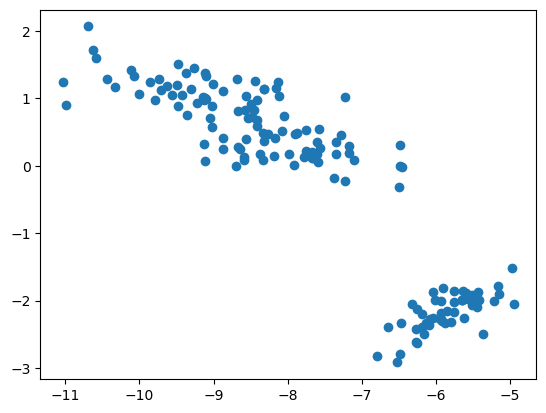

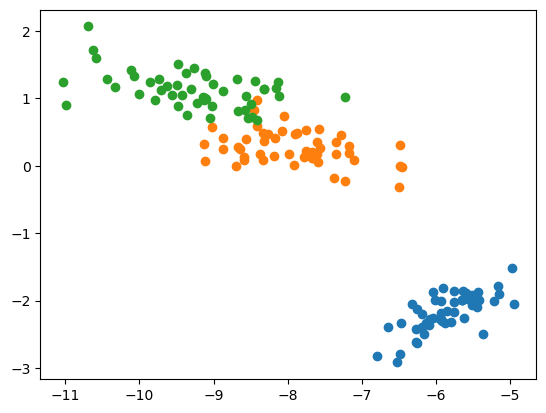

In [121]:

import numpy as np
import matplotlib.pyplot as plt

#######
#  B  #
#######


iris_dtype = np.dtype([('vals', float, (4,)), ('art', np.str_, 16)]) 

vals, labels = np.loadtxt('iris.data', dtype=iris_dtype, delimiter=',', unpack=True) 

iris = vals.T

#######
#  C  #
#######


u,s,vt = np.linalg.svd(iris)
print(s.shape,vt.shape)
print(iris.dtype)

#######
#  D  #
#######

sigma = np.diag(s)

print(vt[0:2,:].shape)

svt = sigma[:,0:2] @ vt[0:2]

fig, ax = plt.subplots()

ax.scatter(svt[0,:],svt[1,:])

#######
#  E  #
#######


fig, tx = plt.subplots()
for lab in np.unique(labels):
    tx.plot(*(svt[:2,labels == lab]),"o")


# Opgave 8.4

Afgør om hvilke af de følgende samlinger vektorer er lineært uafhængig i de givne vektorrum:


(a) $1, x, x^3$ i rummet af differentiable funktioner $[0,1] \rightarrow \mathbb{R}$,


(b) $1, e^x, e^{-x}$ i rummet af differentiable funktioner $[-1,1] \rightarrow \mathbb{R}$.



# Opgave 8.5.
Betragt løsningen
$$
x=f(a, b, c)=\frac{-b+\sqrt{b^2-4 a c}}{2 a}
$$
til andengradsligningen $a x^2+b x+c=0$. I python undersøg hvordan løsningen ændrer sig omkring
$$
(a, b, c)=(2,0,2,0,-1,0) .
$$

Fortæl hvilke af de tre koefficienter $a, b$ og $c$ påvirker resultatet mest.
Beregn gradienten og konditionstallene for $f$ i det givne punkt, og forklar hvordan det hænger sammen med det du har fundet ovenfor.

$$
\begin{align}
\nabla f = (\frac{\delta f}{\delta a},\frac{\delta f}{\delta b},\frac{\delta f}{\delta c})\\
(\frac{b-\sqrt{b^{2}-4ca}}{2a^{2}}-\frac{c}{a\sqrt{b^{2}-4ca}},\frac{\frac{b}{\sqrt{b^{2}-4ac}}-1}{2a},-\frac{1}{\sqrt{b^{2}-4ac}})
\end{align}
$$

In [124]:
def function(a,b,c):
    return (-b+np.sqrt(b**2-(4*a*c)))/(2*a)


abc = np.array([2.0,2.0,-1.0])
lengthOfabc = np.linalg.norm(abc)
# Brug sympy.diff
def gradient(a,b,c):
    return np.array([((b-np.sqrt(b**2-(4*c*a)))/(2*(a**2)))-((c)/(a*np.square(b**2-(4*c*a)))),((((b)/(np.sqrt(b**2-(4*a*c))))-1)/(2)),-(1/(np.sqrt(b**2-(4*a*c))))])

print(gradient(2,2,-1))

kondital = (lengthOfabc*np.linalg.norm(gradient(2,2,-1)))/np.abs((function(2,2,-1)))
# Kondital er forkert da gradient er skrevet ind forkert.
print(kondital)

[-0.17954048 -0.21132487 -0.28867513]
3.2807787993822553


Ændre sig mest ved C da den har den største gradient

# Opgave 8.6
For hvilke A $\in \mathbb{R}^{2x2}$ er
$$
\langle x,y \rangle = x^TAy
$$
et indre produkt?

Krav 1
$$
A=A^{T}
$$
Krav 2
$$
a_{00} \geq 0
$$
Krav 3
$$
a_{11}\geq 0
$$
Krav 4
$$
deskriminaten_A>0
$$